In [1]:
import pandas as pd
import numpy as np
import requests
import json
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

In [2]:
challengers = pd.read_csv('participants.csv')
challengers = challengers.loc[challengers['gameDuration'] > 1000]
bronzes = pd.read_csv('bronzeParticipants.csv')
bronzes = bronzes.loc[bronzes['gameDuration'] > 1000]
golds = pd.read_csv('goldParticipants.csv')
golds = golds.loc[golds['gameDuration'] > 1000]
silver = pd.read_csv('silverParticipants.csv')
silver = silver.loc[silver['gameDuration'] > 1000]
iron = pd.read_csv('ironParticipants.csv')
iron = iron.loc[iron['gameDuration'] > 1000]

C:\Users\zenet\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
frames_1 = [iron, silver, bronzes]
bronzes = pd.concat(frames_1)
bronzes = bronzes.sample(frac=1)

In [4]:
frames_2 = [iron, silver, bronzes]
bronzes = pd.concat(frames_2)
bronzes = bronzes.sample(frac=1)

In [5]:
bronzes = bronzes.replace(True, 1).replace(False, 0)
golds = golds.replace(True, 1).replace(False, 0)
challengers = challengers.replace(True, 1).replace(False, 0)

In [6]:
bronzes.drop_duplicates(inplace=True)
golds.drop_duplicates(inplace=True)
challengers.drop_duplicates(inplace=True)

In [7]:
bronzes['played'] = 1
golds['played'] = 1
challengers['played'] = 1

In [8]:
bronzes.columns

Index(['participantId', 'win', 'item0', 'item1', 'item2', 'item3', 'item4',
       'item5', 'item6', 'kills',
       ...
       'gameId', 'gameDuration', 'lane', 'teamId', 'championId', 'spell1Id',
       'spell2Id', 'firstInhibitorKill', 'firstInhibitorAssist', 'played'],
      dtype='object', length=112)

In [9]:
attr = ['magicDamageDealtToChampions', 'physicalDamageDealtToChampions', 'trueDamageDealtToChampions', 'totalHeal', 'totalDamageTaken', 'magicalDamageTaken', 'physicalDamageTaken', 'totalMinionsKilled', 'neutralMinionsKilled', 'totalTimeCrowdControlDealt', 'gameDuration', 'deaths', 'kills', 'visionScore', 'assists', 'goldEarned', 'played']

In [10]:
f = dict.fromkeys(bronzes[attr], 'mean')
f.update(
    dict.fromkeys(['played'], 'sum'))

In [11]:
bronzes_group = bronzes.groupby(['participantId'])[attr].agg(f)
golds_group = golds.groupby(['participantId'])[attr].agg(f)
challengers_group = challengers.groupby(['participantId'])[attr].agg(f)

In [12]:
bronzes_group = bronzes_group.loc[bronzes_group['played'] > 5]
golds_group = golds_group.loc[golds_group['played'] > 5]
challengers_group = challengers_group.loc[challengers_group['played'] > 5]
challengers_group

,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalDamageTaken,magicalDamageTaken,physicalDamageTaken,totalMinionsKilled,neutralMinionsKilled,totalTimeCrowdControlDealt,gameDuration,deaths,kills,visionScore,assists,goldEarned,played
participantId,,,,,,,,,,,,,,,,,
--Ju_A1b8ZlsnI5b8qovR9jFOOtJ4Ae1xmfIeX0V_ZBjqCsNQ3IshLwd,6980.980198,7475.099010,1031.742574,4718.524752,23549.495050,7010.980198,15104.108911,163.504950,19.217822,237.712871,1603.435644,5.930693,4.346535,24.841584,6.386139,10576.534653,101
--bUxb3LAeED-fpHRWdWa-C1WRaCqP5MJV6wy5h65oSJ,14105.219512,2685.634146,592.634146,9967.207317,23664.414634,8543.036585,14015.134146,147.621951,20.475610,330.292683,1582.170732,5.463415,5.939024,25.280488,7.353659,10654.487805,82
-0Lkl8D8ElJldGfNYcUnVmkD0uGaFTfj9gfwJ5f50HV_guk,4378.863636,13311.536364,1118.081818,3432.800000,17964.500000,6595.400000,10451.845455,180.372727,14.563636,129.654545,1642.900000,6.018182,6.872727,24.127273,7.490909,12089.209091,110
-0QvxtwHrJvG4nwAeZMO6yLPb-tUpSWVFrQ6OP-FyCcbs2E,5298.535354,12717.303030,792.868687,4831.474747,19177.595960,6306.868687,11812.333333,205.313131,12.858586,155.424242,1650.030303,5.161616,6.161616,27.878788,7.333333,12313.272727,99
-0q9CShTijqQFgPFXUabkwgN4SEYXlZhS_Zj8QTUxVQ,16516.897436,1574.000000,438.153846,2030.820513,14453.692308,5244.923077,8436.487179,156.461538,14.384615,202.615385,1625.512821,4.948718,5.076923,25.564103,8.435897,10754.538462,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zmk6Fd82FgJIZeWFdxIzbTw4nLrRcbIzrAYcaMoTQcVk8g,2115.333333,13535.266667,732.933333,2083.466667,14516.400000,4704.400000,9025.866667,164.333333,14.266667,62.666667,1557.133333,4.866667,7.000000,21.466667,7.333333,11446.533333,15
znJrcvyF7iCJ5EQd-NYOxbOIiH8IJ3Z7ckM_UGTKup1-sYw,5703.166667,6793.333333,1617.500000,2589.166667,15697.500000,6419.333333,8204.500000,56.666667,4.333333,283.833333,1548.333333,7.000000,4.333333,37.166667,13.666667,8978.166667,6
znqUOlGVV0ouySxNrxJ6TGnTC-wGtx_ARiFcXsAQR_O2J1k,5003.444444,10788.555556,51.888889,2225.500000,22786.333333,7232.055556,13030.500000,144.833333,1.444444,487.777778,1614.555556,5.611111,4.388889,14.444444,6.111111,9323.388889,18


In [13]:
golds_group

,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalDamageTaken,magicalDamageTaken,physicalDamageTaken,totalMinionsKilled,neutralMinionsKilled,totalTimeCrowdControlDealt,gameDuration,deaths,kills,visionScore,assists,goldEarned,played
participantId,,,,,,,,,,,,,,,,,
-N0rO9-JJcEXjbMxY2uhGbHq1LQW9l3zbWgaHQb2PByZtHE,4676.185185,14198.814815,1446.481481,3688.259259,20503.629630,6802.740741,12565.370370,121.074074,35.444444,219.629630,1716.888889,6.666667,7.740741,26.740741,8.592593,12039.518519,27
-rIpeNC-3ZSBody4c19vy-3VGXA1nKps3nun71e9J1aCRfY,6237.785714,1050.214286,805.500000,6599.928571,15283.428571,6806.285714,7823.642857,31.928571,0.142857,209.357143,1699.928571,6.642857,2.142857,56.500000,16.071429,8143.428571,14
-rnmLDbSApMIApVaam6Nim4f-LB9F0flP_IL961adK6RX3A,7403.000000,12828.833333,940.000000,4713.833333,28574.166667,11526.000000,15377.500000,154.166667,9.333333,303.833333,1724.500000,8.166667,5.666667,21.500000,9.666667,13559.500000,6
-tsoUulvUDiADIP2SoAzZ0nr0qmIpHS6szkMkDZwprd8_MM,2727.054054,16634.270270,1633.054054,4593.189189,17621.297297,6477.648649,10201.810811,164.837838,9.351351,89.432432,1733.540541,4.972973,8.405405,10.351351,7.810811,12436.054054,37
-u1QHCj_GqkoHPlfYObg8kQpCL8fdHUFkH7IPGEiwIIXAIg,4612.025000,11207.475000,1638.350000,7204.000000,26060.625000,8289.900000,16357.650000,102.900000,46.000000,189.350000,1822.600000,8.150000,7.050000,19.800000,7.575000,11488.550000,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
za32_VSLimzDk9vcv3BrQkcNysr9y5x8attretrE4naU0fE,5871.516129,918.483871,745.161290,7031.387097,12706.322581,5223.064516,7011.516129,15.806452,0.806452,164.967742,1749.774194,5.129032,1.548387,56.741935,13.903226,7825.774194,31
zfvFiv4lW6iIgoIniqxS7qDqNtDnm5-Iqfw2Jq9gG_fcOn8,5688.800000,1380.500000,592.700000,11054.800000,24161.900000,7685.900000,14773.900000,12.600000,114.700000,475.100000,1674.200000,5.200000,3.800000,17.300000,8.000000,9005.300000,10
zjPW8GABeOG1fMhJZoacIrLJ9PsTi4X7EI_4XYgegVE1cNo,8249.666667,5235.750000,1502.750000,4895.166667,27075.750000,10468.166667,14915.416667,31.416667,1.583333,260.166667,1955.416667,7.833333,4.500000,42.666667,23.583333,10992.750000,12


In [14]:
bronzes_group

,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalDamageTaken,magicalDamageTaken,physicalDamageTaken,totalMinionsKilled,neutralMinionsKilled,totalTimeCrowdControlDealt,gameDuration,deaths,kills,visionScore,assists,goldEarned,played
participantId,,,,,,,,,,,,,,,,,
-1H4fHNvmGKv4J0c2zmgLBYh2vUs0aqjFU5M7NJipsIVpZk,8135.388889,4224.194444,477.805556,3996.750000,18498.916667,6653.361111,10749.750000,76.222222,17.166667,179.222222,1605.166667,6.500000,5.805556,22.111111,10.277778,10536.944444,36
-6_nHueyRP2gvyygzsXvH6tiiVK5pPLJRjKv9N7YCQVT51w,6316.166667,9565.777778,459.861111,7356.166667,28047.972222,8093.916667,18496.666667,101.444444,52.500000,277.333333,1744.166667,4.944444,7.750000,21.000000,6.916667,11210.027778,36
-9WTTvWN-dfG385Mtbl5jBQmFMznte_qUPP1M1WyNhBP5sAVEv_KkWgl,2259.235294,2915.588235,566.294118,2880.647059,16815.588235,4676.764706,10915.529412,24.647059,3.764706,66.176471,1721.588235,7.882353,2.941176,5.411765,7.647059,7542.588235,17
-CBTmn1mieDlJ5n3YDyKxSkW96RKCWTphTWBW0tGvRaGZ2M,911.625000,17122.500000,1573.000000,2782.875000,23457.125000,10533.250000,11848.750000,150.125000,2.500000,271.125000,2033.500000,9.375000,6.500000,1.625000,7.875000,11809.125000,8
-MK3QspMWD7GtH5s1Y1cYRHNqsgzb4Ng611S3MskVkRNJnM,3275.333333,11752.606061,1631.454545,4629.454545,19293.212121,6347.969697,11969.545455,117.030303,18.272727,94.727273,1819.333333,6.242424,7.272727,13.272727,7.030303,11063.878788,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zfBGcMKvsw8XF8Nt_QZyURMVxU4xaJCDbGbReZ_ZBl8qLnk,20257.222222,1165.027778,392.000000,2792.083333,18244.722222,7644.777778,9611.027778,120.916667,8.527778,190.027778,1866.500000,6.055556,6.333333,23.722222,9.694444,10946.222222,36
zjOVwxF8S_112i7tPDN1wL4QtzwjFf8boIrrmFFNCmIIKDY,8197.969697,7400.303030,917.090909,5271.515152,27130.242424,11666.242424,14272.333333,69.727273,9.787879,117.909091,1529.848485,9.424242,6.151515,12.303030,8.575758,12686.454545,33
znMyMqTTtvNQzAMBnq_dFuGM9NdSVKORInRbRnOqHZc0YlcUOI_5SU67,13171.166667,7650.000000,1211.166667,12688.833333,31718.833333,10058.666667,20611.166667,51.333333,121.833333,205.333333,2153.166667,7.166667,12.500000,16.000000,7.000000,14171.833333,6


In [15]:
bronzes_group['tier'] = 1
golds_group['tier'] = 2
challengers_group['tier'] = 3

In [16]:
frames = [bronzes_group,golds_group,challengers_group]
df = pd.concat(frames)
df = df.sample(frac=1)
df

,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalDamageTaken,magicalDamageTaken,physicalDamageTaken,totalMinionsKilled,neutralMinionsKilled,totalTimeCrowdControlDealt,gameDuration,deaths,kills,visionScore,assists,goldEarned,played,tier
participantId,,,,,,,,,,,,,,,,,,
28y54469dUfkPWcASTQsDtMEipEc4XEFk5_Kgm9UUijl8kMEwpCbzBAq,12239.876543,3503.000000,762.555556,2823.962963,16827.012346,6245.790123,9674.580247,161.814815,11.395062,220.950617,1589.617284,5.024691,4.888889,26.320988,7.086420,10293.666667,81,3
GrrbzQ2Uc_Efgo3z2dLa7T8BNS_Jq5WmW3WX-Em9d4lcgKwTjnOJiMcc,2555.388350,15329.893204,1095.087379,3892.699029,16306.087379,5715.427184,9790.708738,164.747573,17.514563,113.970874,1561.990291,4.883495,6.815534,24.485437,7.873786,11590.194175,103,3
0k57DFypRNHf8Iw414KLhvry8Mzgbcst98N0c7x3jgi3kg,3222.436170,10516.787234,2839.925532,2862.989362,17762.244681,6358.180851,10324.095745,169.244681,9.329787,87.170213,1579.117021,6.148936,7.202128,25.468085,5.989362,11290.117021,94,3
d-GgEMwvC768DXHT2Z2wTK0ftB8n080KpxEuM2jhDLz6aBo,872.111111,6027.777778,871.222222,8282.944444,22827.861111,5380.555556,16856.361111,29.277778,68.833333,131.388889,1786.611111,6.388889,3.111111,22.555556,3.638889,8281.027778,36,1
6-5paYZfg9uCBph2InpR9Kxm-oi2o1CqxQ6UorFnWe-5LwE,6666.472222,11088.138889,1879.194444,4231.083333,25880.833333,9315.972222,15526.111111,82.888889,23.250000,113.805556,1799.277778,9.361111,8.500000,14.111111,6.416667,10898.916667,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2b1yv4uiJStb6LSQ5hNtCRdrWmzU34TdHKrZsSpOUVKv,1837.090909,13095.454545,902.727273,2743.727273,19515.545455,6698.727273,11924.000000,197.545455,23.090909,195.636364,1641.818182,6.090909,6.181818,25.090909,5.363636,12768.181818,11,3
dyKLkFIoDhTLDQHwageOaWg20TCu8cOvq83158GbN7gWJ6RC6TgMNRrv,9396.407407,5621.296296,1004.962963,4230.370370,23162.703704,8315.000000,13669.444444,150.370370,10.370370,219.037037,1595.222222,7.000000,4.148148,18.518519,7.925926,10140.185185,27,3
5SnaTCiPO3VFIN9I_NTwIdyKhDNyS6xPa7r00v9LoQMMTuY,16289.800000,1444.600000,871.350000,4162.650000,20960.250000,7141.900000,12723.900000,151.950000,10.500000,56.650000,1599.600000,5.450000,8.150000,12.550000,6.550000,11234.250000,20,3


In [17]:
Xtrain, Xtest, y_train, y_test = train_test_split(df[attr], df['tier'], test_size=0.3)

In [18]:
# Define the scaler 
ss = StandardScaler().fit(Xtrain)

# Scale the train set
X_train = ss.transform(Xtrain)

# Scale the test set
X_test = ss.transform(Xtest)

In [19]:
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=500, max_features='log2')
classifier = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.830255057167986


In [20]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=2)
model2.fit(X_train,y_train)
predicted2= model2.predict(X_test)
print("Predicted Value:", predicted2)
print("Accuracy:",metrics.accuracy_score(y_test, predicted2))

Predicted Value: [1 3 1 ... 1 1 1]
Accuracy: 0.7493403693931399


In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
predicted= model.predict(X_test)
print("Predicted Value:", predicted)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Predicted Value: [1 3 1 ... 1 1 2]
Accuracy: 0.7106420404573439


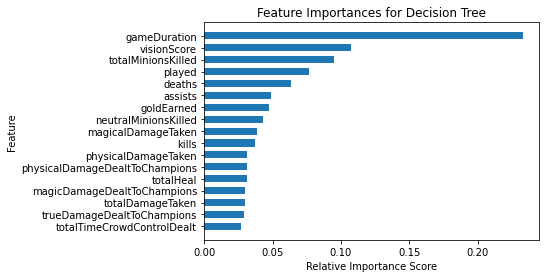

In [22]:
rf_feature_importances = clf.feature_importances_
rf_feature_names, rf_feature_scores = zip(*sorted(zip(attr, rf_feature_importances), 
                                                          key=lambda x: x[1]))
y_position = list(range(len(rf_feature_names)))
plt.barh(y_position, rf_feature_scores, height=0.6, align='center')
plt.yticks(y_position , rf_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

[[366   6  33]
 [ 85  22  33]
 [ 23  13 556]]


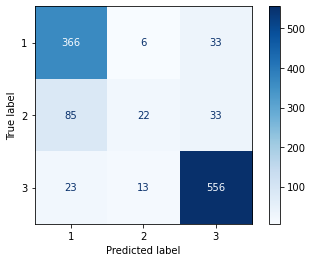

In [23]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=['1','2','3'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)

print(disp.confusion_matrix)